In [2]:
import os
os.chdir("..")

In [3]:
from utils import *
from keras.models import load_model

In [3]:
folder = "A-Moller sim"
n_Moller = 42 # 42

for i, n_file in enumerate(range(1, n_Moller + 1)):
    Ia_phot_anais = f"{folder}/Ia/DES_Ia-{n_file:04d}_PHOT.FITS"
    Ia_head_anais = f"{folder}/Ia/DES_Ia-{n_file:04d}_HEAD.FITS"

    nonIa_phot_anais = f"{folder}/nonIa/DES_NONIa-{n_file:04d}_PHOT.FITS"
    nonIa_head_anais = f"{folder}/nonIa/DES_NONIa-{n_file:04d}_HEAD.FITS"

    Ia_Moller_preprocess = preprocess(Ia_phot_anais, head_file=Ia_head_anais,
                                      band='FLT', normalize=True)

    nonIa_Moller_preprocess = preprocess(nonIa_phot_anais,
                                         head_file=nonIa_head_anais,
                                         band='FLT', normalize=True)

    if i == 0:
        Ia_curves_Moller = Ia_Moller_preprocess
        nonIa_curves_Moller = nonIa_Moller_preprocess
        continue
    
    Ia_curves_Moller = pd.concat((Ia_curves_Moller, Ia_Moller_preprocess),
                                 ignore_index=True)
    nonIa_curves_Moller = pd.concat((nonIa_curves_Moller, nonIa_Moller_preprocess),
                                    ignore_index=True)

curves_Moller = pd.concat((Ia_curves_Moller, nonIa_curves_Moller),
                          ignore_index=True)

curves_Moller['Type'] = [1 if j < len(Ia_curves_Moller) else 0
                         for j in range(len(curves_Moller))]


c:\Users\aleja\anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:509: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable cause: s too small. (abs(fp-s)/s>0.001)
  warnings.warn(RuntimeWarning(_iermess[ier][0]))
c:\Users\aleja\anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:509: RuntimeWarning: The maximal number of iterations (20) allowed for finding smoothing
spline with fp=s has been reached. Probable cause: s too small.
(abs(fp-s)/s>0.001)
  warnings.warn(RuntimeWarning(_iermess[ier][0]))
c:\Users\aleja\anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:509: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable cause: s too small. (abs(fp-s)/s>0.001)
  warnings.warn(RuntimeWarning(_iermess[ier][0]))
c:\Users\aleja\anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:509: RuntimeWarning: The maximal number of iterations (20) allowed 

In [4]:
curves_RNN_Moller, types_RNN_Moller = RNN_reshape(curves_Moller)

In [5]:
model_file = "data_folder/model_1bl_4LSTM.keras"
best_model = load_model(f"./{model_file}")

In [6]:
model_predict_Moller = best_model.predict(curves_RNN_Moller)

60399/60399 [==============================] - 384s 6ms/step


In [7]:
nan_index_Moller = np.argwhere(np.isnan(model_predict_Moller))
print(f"#NaN values: {nan_index_Moller.size}")
print(f"#lightcurves: {model_predict_Moller.size}")

mask = np.ones(model_predict_Moller.shape, dtype=bool)
mask[nan_index_Moller] = False

#NaN values: 19802
#lightcurves: 1932767


Normalized confusion matrix


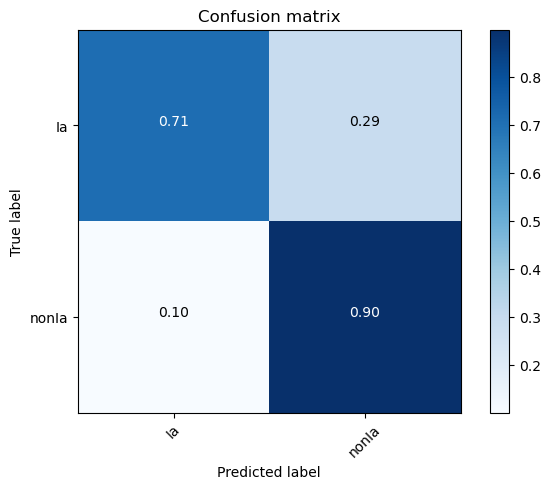

In [8]:
plot_confusion_matrix(types_RNN_Moller[mask],
                      model_predict_Moller[mask].round(),
                      ['Ia', 'nonIa'], normalize=True)

AUC = 0.8048240924331003


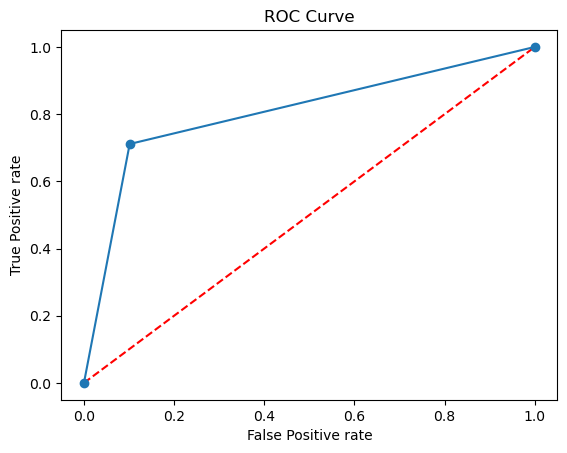

In [9]:
plot_roc_curve(types_RNN_Moller[mask],
               model_predict_Moller[mask].round(),
               auc_print=True)

### model
- 1 bidirectional layer
- 4 LSTM
- no data augmentation

In [13]:
model_file = "data_folder/model_1bl_4LSTM_no_aug.keras"
best_model = load_model(f"./{model_file}")

In [5]:
model_predict_Moller = best_model.predict(curves_RNN_Moller)  # murió la RAM

NameError: name 'curves_RNN_Moller' is not defined

In [ ]:
plot_confusion_matrix(types_RNN_Moller[mask],
                      model_predict_Moller[mask].round(),
                      ['Ia', 'nonIa'], normalize=True)

In [ ]:
plot_roc_curve(types_RNN_Moller[mask],
               model_predict_Moller[mask].round(),
               auc_print=True)

# My data

In [22]:
Ia_phot = "Lightcurves\curves\Ia\DES\DES_Ia_PHOT.FITS"
Ia_head = "Lightcurves\curves\Ia\DES\DES_Ia_HEAD.FITS"

nonIa_phot = "Lightcurves\curves/nonIa\DES\DES_nonIa_PHOT.FITS"
nonIa_head = "Lightcurves\curves/nonIa\DES\DES_nonIa_HEAD.FITS"

Ia_preprocess = preprocess(Ia_phot, head_file=Ia_head, normalize=True)
nonIa_preprocess = preprocess(nonIa_phot, head_file=nonIa_head, normalize=True)

curves = pd.concat((Ia_preprocess, nonIa_preprocess), ignore_index=True)

c:\Users\aleja\anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:509: RuntimeWarning: The maximal number of iterations (20) allowed for finding smoothing
spline with fp=s has been reached. Probable cause: s too small.
(abs(fp-s)/s>0.001)
  warnings.warn(RuntimeWarning(_iermess[ier][0]))


In [23]:
types = [1 if j < len(Ia_preprocess) else 0 for j in range(len(curves))]
curves['Type'] = types

In [24]:
curves_RNN, types_RNN = RNN_reshape(curves)

In [34]:
model_file = "data_folder/model_1bl_4LSTM.keras"
best_model = load_model(f"./{model_file}")

In [35]:
model_predict = best_model.predict(curves_RNN)

6198/6198 [==============================] - 26s 4ms/step


In [36]:
nan_index = np.argwhere(np.isnan(model_predict))
print(f"#NaN values: {nan_index.size}")

mask = np.ones(model_predict.shape, dtype=bool)
mask[nan_index] = False

#NaN values: 0


Normalized confusion matrix


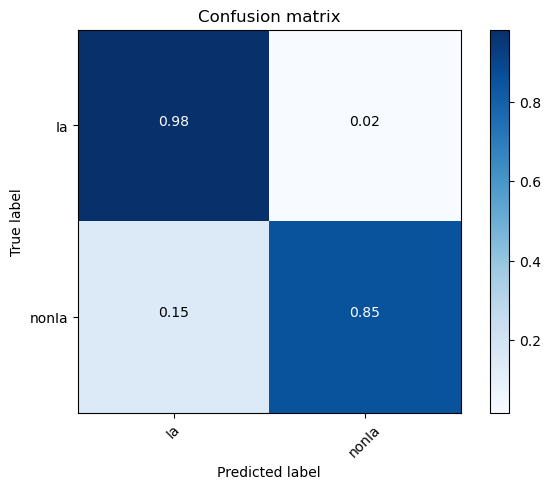

In [37]:
plot_confusion_matrix(types_RNN[mask], model_predict[mask].round(),
                      ['Ia', 'nonIa'], normalize=True)

Normalized confusion matrix


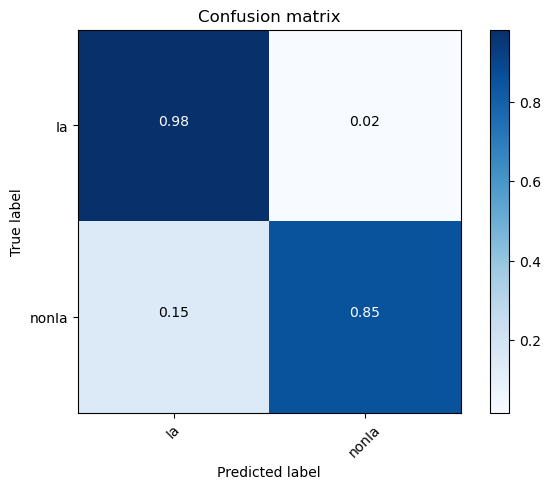

In [38]:
plot_confusion_matrix(types_RNN[mask], model_predict[mask].round(),
                      ['Ia', 'nonIa'], normalize=True)

### File: norm

In [14]:
curves_file = np.load('data_folder/curves_RNN_norm.npy')
types_file = np.load('data_folder/types_RNN_norm.npy')

model_predict_file = best_model.predict(curves_file)

6198/6198 [==============================] - 24s 4ms/step


In [11]:
nan_index_file = np.argwhere(np.isnan(model_predict_file))
print(f"#NaN values: {nan_index_file.size}")

mask_file = np.ones(model_predict_file.shape, dtype=bool)
mask_file[nan_index_file] = False

#NaN values: 0


Normalized confusion matrix


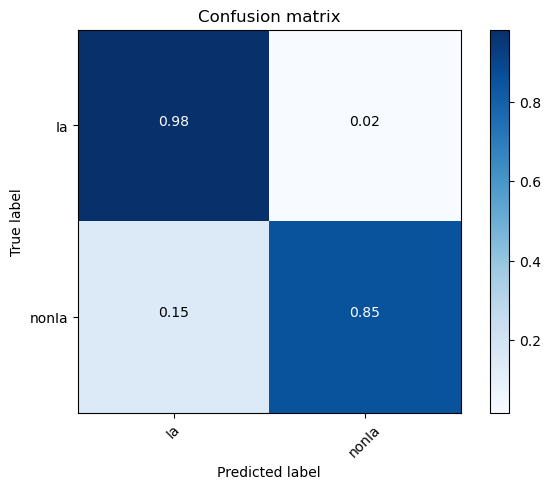

In [15]:
plot_confusion_matrix(types_file[mask_file], model_predict_file[mask_file].round(),
                      ['Ia', 'nonIa'], normalize=True)


AUC = 0.9173291699484788


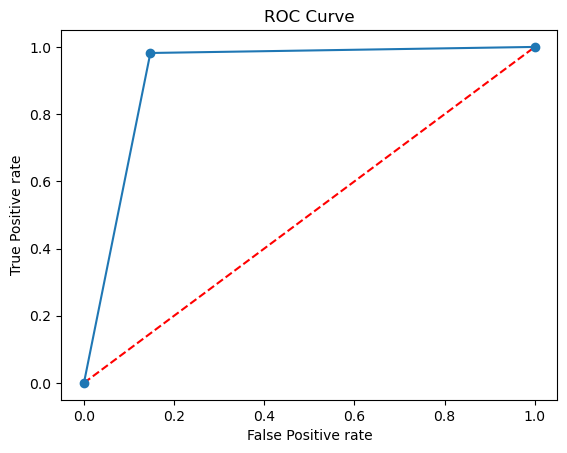

In [17]:
plot_roc_curve(types_file[mask_file],
               model_predict_file[mask_file].round(),
               auc_print=True)

### File: norm + aug

In [18]:
curves_file = np.load('data_folder/curves_RNN_norm_aug.npy')
types_file = np.load('data_folder/types_RNN_norm_aug.npy')

model_predict_file = best_model.predict(curves_file)

68173/68173 [==============================] - 271s 4ms/step


In [19]:
nan_index_file = np.argwhere(np.isnan(model_predict_file))
print(f"#NaN values: {nan_index_file.size}")

mask_file = np.ones(model_predict_file.shape, dtype=bool)
mask_file[nan_index_file] = False

#NaN values: 0


Normalized confusion matrix


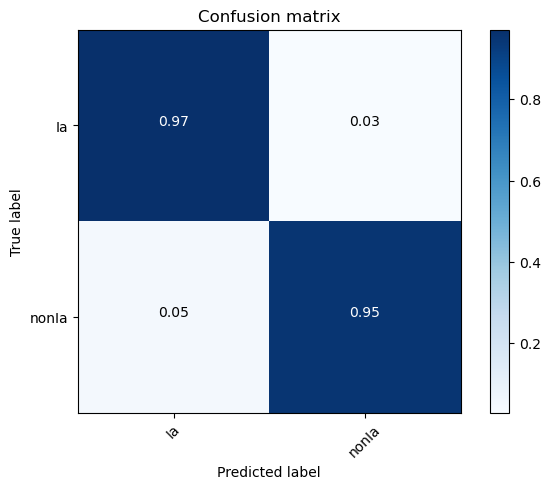

In [20]:
plot_confusion_matrix(types_file[mask_file], model_predict_file[mask_file].round(),
                      ['Ia', 'nonIa'], normalize=True)

AUC = 0.9601986304786663


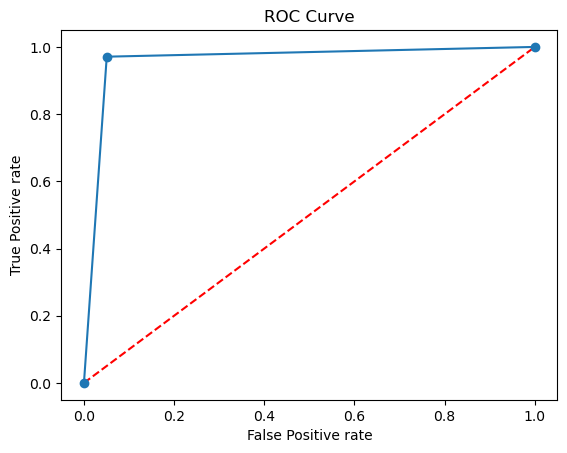

In [21]:
plot_roc_curve(types_file[mask_file],
               model_predict_file[mask_file].round(),
               auc_print=True)